#### Import tensorflow and necessary library

In [54]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [55]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#### Let's mark down our tensorflow version and python version first

In [56]:
print(tf.__version__)

1.12.0


In [57]:
import sys
print(sys.version)

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]


#### download fashion_mnist training set from keras. train_images and train_labels are training sets used for learning, test_images and test_labels are used for testing

In [58]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### images are 28*28 numpy arrays and labels are numbers 0-9, we use class_names below to store the integer labels corresponding content

In [59]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### information about images and labels

In [60]:
# information about trainging images: 60000 images, 28*28 size
train_images.shape

(60000, 28, 28)

In [61]:
# numbers of labels in traning set
len(train_labels)

60000

In [62]:
#information about training labels
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
#information about test images: 10000 images, 28*28 size
test_images.shape

(10000, 28, 28)

In [24]:
#number of test labels
len(test_labels)

10000

In [23]:
#information about testing labels
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

#### Preprocessing 

Let's see a figure in the training set, we saw the color component is from 0-255, before we input into neural network, we need to preprocess this data into range [0,1]

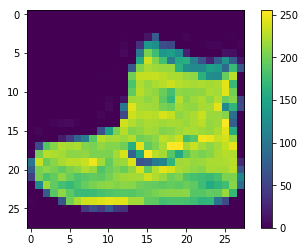

In [63]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [64]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Let's verify first 25 figures after preprocessing, and see if they are good for training

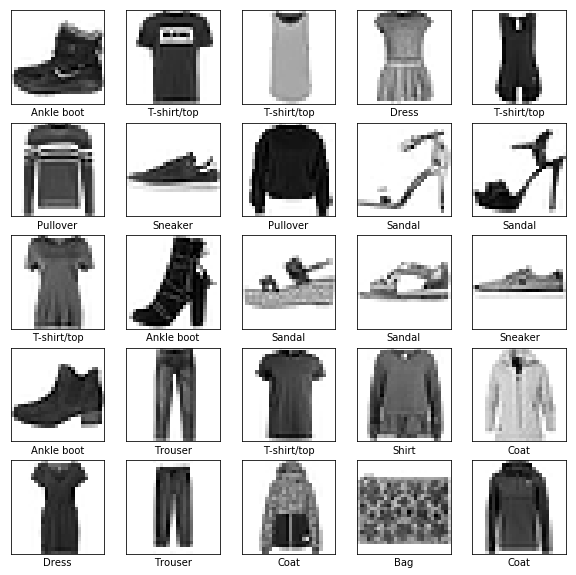

In [65]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

#### Build the neural network 

In [66]:
# First layer is to flattern the 28*28 2D array into 1*784 1D array
# next two layers are dense layers, the last layer generate 10 possibility corresponding to 10 labels

# Activation function:
# RELU: Rectified Linear Unit Activation Function.
# The ReLU is the most used activation function in the world right now. Since it is used in almost all the convolutional neural networks or deep learning.
# The softmax function is a more generalized logistic activation function which is used for multiclass classification.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#### Compile the neural network 

In [67]:
# set loss function, optimizer and metrics
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### train the model 

In [68]:
# use fit to train the model, we can see the loss decreasing and accuraray increasing 
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.4998 - acc: 0.8231
Epoch 2/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.3794 - acc: 0.8621
Epoch 3/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.3393 - acc: 0.8760
Epoch 4/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.3159 - acc: 0.8830
Epoch 5/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.2974 - acc: 0.8908


#### verify the accuracy 

In [69]:
# use our test sets to verify the accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/step
Test accuracy: 0.8735


#### use our model for prediction 

In [70]:
predictions = model.predict(test_images)

In [71]:
# Let's see the probability distribution of our first image in the test set
predictions[0]

array([2.8920106e-06, 5.7484692e-07, 1.7374997e-07, 2.4427243e-07,
       1.3465602e-06, 6.8578371e-03, 3.2690957e-06, 2.1693567e-02,
       3.3614830e-05, 9.7140652e-01], dtype=float32)

In [72]:
# use numpy to find which category does the max probability belong to 
np.argmax(predictions[0])

9

In [73]:
# then we check the test sets to see if the prediction is right
test_labels[0]

9

#### Plot our prediction to visualize the result 

In [74]:
# Let's define two functions to help with our visualization
# blue color suggest accurate prediction and red color means false prediction

# First function to plot images
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
    
  # formatting the label under the picture
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Second function to plot the Probability distributions 
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

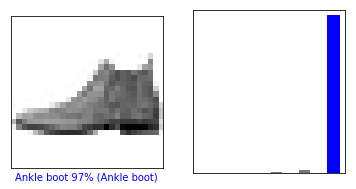

In [75]:
# Let's see the result for the first figure
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

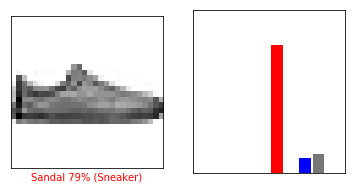

In [76]:
# Let's see the result for the 13th figure
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

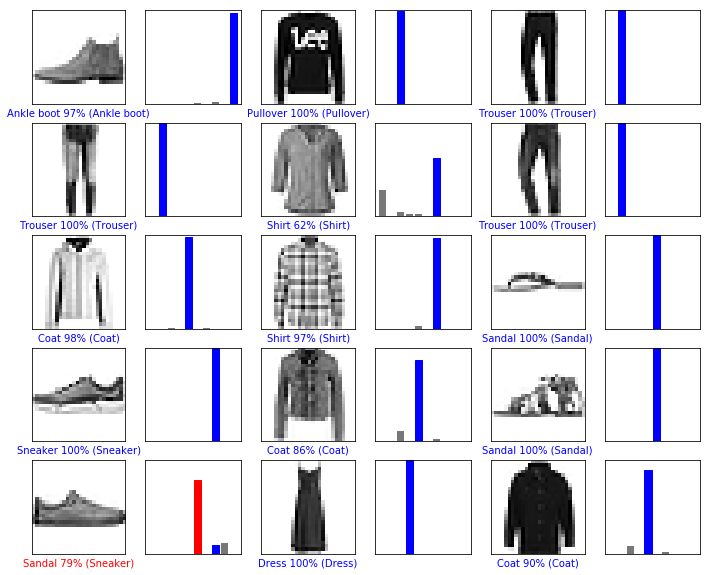

In [77]:
# Plot the first 3*5 = 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

#### use our model and our visualization function to predict any single image 

In [78]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [79]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [80]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.8920051e-06 5.7484800e-07 1.7375014e-07 2.4427243e-07 1.3465591e-06
  6.8578371e-03 3.2690928e-06 2.1693574e-02 3.3614862e-05 9.7140652e-01]]


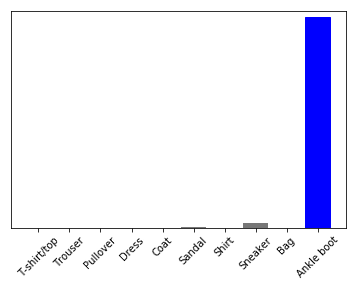

In [81]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [82]:
np.argmax(predictions_single[0])

9

#### Image classification completed 